In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

# Data Acquisition and cleaning 

In [16]:
df_scores = pd.read_csv('Scores.csv',usecols=["SampleID2", "Score", "PSS", "Counter", "Origin",
            "Standard", "Description", "Region", "SubRegion"])
df_comments = pd.read_csv( '2018_19_20_21CuppingDataSheet.csv', usecols=["SampleID2", "Agtron", "Moisture", "Aw", "Comments"])
df = pd.merge(df_scores, df_comments, on='SampleID2', how='left')
df.fillna("", inplace=True)
df_nonsensory = df
for index, row in df.iterrows():
    df.iloc[index, 3] = df.iloc[index, 3].replace("'", '')
    df.iloc[index, 3] = df.iloc[index, 3].replace('"', '')
    df.iloc[index, 3] = df.iloc[index, 3].replace(";", '')
    df.at[index, 'Phenol'] = False
            #df.at[index, 'Acid'] = False
            #df.at[index, 'Citri'] = False
    df.at[index, 'Sugar'] = False
            #df.at[index, 'Soft'] = False
    df.at[index, 'Juicy'] = False
    df.at[index, 'Tangy'] = False
            #df.at[index, 'Tart'] = False
            #df.at[index, 'Chocolate'] = False
    df.at[index, 'Nut'] = False
    df.at[index, 'Berry'] = False
            #df.at[index, 'Spice'] = False
    df.at[index, 'Caramel'] = False
    df.at[index, 'Herb'] = False
            #df.at[index, 'Melon'] = False
    df.at[index, 'Grape'] = False
    df.at[index, 'Stone'] = False
            #df.at[index, 'Delicate'] = False
            #df.at[index, 'Clean'] = False
            #df.at[index, 'Savory'] = False
    df.at[index, 'Floral'] = False
    df.at[index, 'Bitter'] = False
    df.at[index, 'Jasmine'] = False
    df.at[index, 'Wine'] = False
    df.at[index, 'Tropical'] = False
            #df.at[index, 'Sweet'] = False
    df.at[index, 'Syrup'] = False
            #df.at[index, 'Toffee'] = False
    df.at[index, 'DFC'] = False
    df.at[index, 'AGE'] = False
    df.at[index, 'Sour'] = False
    df.at[index, 'Variable'] = False
    df.at[index, 'Ferment'] = False
    df.at[index, 'TCA'] = False
    df.at[index, 'Dirty'] = False
    df.at[index, 'Herb'] = False
    comments = df.at[index, 'Comments']
    words = comments.split(',')
    for attribute in words:
        more_words = attribute.split(" ")
        for word in more_words:
             # Remove :'s
            word = word.replace(':', '')
            if word.lower().strip() in ['phenol', 'phenolic']:
                df.at[index, "Phenol"] = word.lower().strip() in ['phenol', 'phenolic']
                    #elif word.lower().strip() == 'acid':
                        #df.at[index, "Acid"] = word.lower().strip() == 'acid'
                    #elif word.lower().strip() == 'citri':
                        #df.at[index, "Citri"] = word.lower().strip() == 'citri'
            elif word.lower().strip() == 'sugar':
                df.at[index, "Sugar"] = word.lower().strip() == 'sugar'
                    #elif word.lower().strip() == 'soft':
                        #df.at[index, "Soft"] = word.lower().strip() == 'soft'
            elif word.lower().strip() == 'juicy':
                df.at[index, "Juicy"] = word.lower().strip() == 'juicy'
            elif word.lower().strip() == 'tangy':
                df.at[index, "Tangy"] = word.lower().strip() == 'tangy'
                    #elif word.lower().strip() == 'tart':
                        #df.at[index, "Tart"] = word.lower().strip() == 'tart'
                    #elif word.lower().strip() == 'chocolate':
                        #df.at[index, "Chocolate"] = word.lower().strip() == 'chocolate'
            elif 'nut' in word.lower().strip():
                df.at[index, "Nut"] = 'nut' in word.lower().strip()
            elif word.lower().strip() == 'berry':
                df.at[index, "Berry"] = word.lower().strip() == 'berry'
                    #elif word.lower().strip() == 'spice':
                        #df.at[index, "Spice"] = word.lower().strip() == 'spice'
            elif word.lower().strip() == 'caramel':
                df.at[index, "Caramel"] = word.lower().strip() == 'caramel'
            elif word.lower().strip() == 'herb':
                df.at[index, "Herb"] = word.lower().strip() == 'herb'
                    #elif word.lower().strip() == 'melon':
                        #df.at[index, "Melon"] = word.lower().strip() == 'melon'
            elif word.lower().strip() == 'grape':
                df.at[index, "Grape"] = word.lower().strip() == 'grape'
            elif word.lower().strip() in ['stone', 'stone fruit', 'peach', 'appricot', 'nectarine']:
                df.at[index, "Stone"] = word.lower().strip() in ['stone', 'stone fruit', 'peach', 'appricot', 'nectarine']
                    #elif word.lower().strip() == 'delicate':
                        #df.at[index, "Delicate"] = word.lower().strip() == 'delicate'
                    #elif word.lower().strip() == 'clean':
                        #df.at[index, "Clean"] = word.lower().strip() == 'clean'
                    #elif word.lower().strip() == 'savory':
                        #df.at[index, "Savory"] = word.lower().strip() == 'savory'
            elif word.lower().strip() == 'floral':
                df.at[index, "Floral"] = word.lower().strip() == 'floral'
            elif word.lower().strip() == 'bitter':
                df.at[index, "Bitter"] = word.lower().strip() == 'bitter'
            elif word.lower().strip() == 'jasmine':
                df.at[index, "Jasmine"] = word.lower().strip() == 'jasmine'
            elif word.lower().strip() == 'wine':
                df.at[index, "Wine"] = word.lower().strip() == 'wine'
            elif word.lower().strip() in ['tropical', 'tropical fruit', 'tropicalfruit']:
                df.at[index, "Tropical"] = word.lower().strip() in ['tropical', 'tropical fruit', 'tropicalfruit']
                    #elif word.lower().strip() == 'sweet':
                        #df.at[index, "Sweet"] = word.lower().strip() == 'sweet'
            elif word.lower().strip() == 'syrup':
                df.at[index, "Syrup"] = word.lower().strip() == 'syrup'
                    #elif word.lower().strip() == 'toffee':
                        #df.at[index, "Toffee"] = word.lower().strip() == 'toffee'
            elif word.lower().strip() == 'dfc':
                lower_case_words = [x.lower() for x in more_words]
                if 'phenolic' in lower_case_words or 'phenol' in lower_case_words:
                    continue
                    df.at[index, "DFC"] = word.lower().strip() == 'dfc'
                elif word.lower().strip() == 'age':
                    df.at[index, "AGE"] = word.lower().strip() == 'age'
                elif word.lower().strip() == 'sour':
                    df.at[index, "Sour"] = word.lower().strip() == 'sour'
                elif word.lower().strip() == 'variable':
                    df.at[index, "Variable"] = word.lower().strip() == 'variable'
                elif word.lower().strip() == 'ferment':
                    df.at[index, "Ferment"] = word.lower().strip() == 'ferment'
                elif word.lower().strip() == 'tca':
                    df.at[index, "TCA"] = word.lower().strip() == 'tca'
                elif word.lower().strip() == 'dirty':
                    df.at[index, "Dirty"] = word.lower().strip() == 'dirty'
                    df.drop(df[df.Score == ""].index, inplace=True)
                    df['Score'] = df['Score'].astype(float, errors='raise')
                    df = df[(df['Comments'] != '') & (df['Score'] > 79.9) & (df['Score'] <= 100.0)]
                    df_sensory = df[['Score', 'Phenol', 'Sugar', 'Juicy', 'Tangy',
                                     'Nut', 'Caramel', 'Herb', 'Grape', 'Stone',
                                     'Floral', 'Bitter', 'Jasmine', 'Wine', 'Tropical', 'Syrup',
                                     'DFC', 'AGE', 'Sour', 'Variable', 'Ferment', 'TCA', 'Dirty','Origin']]
                    df_sensory.to_csv('sensory with class.csv')
                    df_nonsensory = df_nonsensory[(df_nonsensory['Agtron'] != '') & (df_nonsensory['Moisture'] != '') & (df_nonsensory['Aw'] != '')]
                    df_nonsensory = df_nonsensory[['Score', 'Agtron', 'Moisture', 'Aw']]
                    df_nonsensory.to_csv('nonsensory-clean.csv')
#        print('test')

In [2]:
#input data
sensory = pd.read_csv('sensory with class.csv')
sensory

,Class,Score,Phenol,Sugar,Juicy,Tangy,Nut,Caramel,Herb,Grape,...,Wine,Tropical,Syrup,DFC,AGE,Sour,Variable,Ferment,TCA,Dirty
0,Specialty,83.625000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Specialty,83.375000,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Commercial,85.250000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Specialty,81.500000,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Specialty,83.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,Specialty,83.666667,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13373,Commercial,85.750000,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13374,Specialty,84.875000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13375,Specialty,81.000000,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
feature_names = sensory.columns.tolist()
for column in feature_names:
    print (column)
    print (sensory[column].value_counts(dropna=False))

Class
Commercial    7420
Specialty     4906
High-end      1051
Name: Class, dtype: int64
Score
84.500000    515
85.000000    511
84.000000    500
86.000000    477
83.500000    413
            ... 
92.500000      1
84.330000      1
80.100000      1
84.443333      1
85.780000      1
Name: Score, Length: 362, dtype: int64
Phenol
False    13359
True        18
Name: Phenol, dtype: int64
Sugar
False    11564
True      1813
Name: Sugar, dtype: int64
Juicy
False    12048
True      1329
Name: Juicy, dtype: int64
Tangy
False    12399
True       978
Name: Tangy, dtype: int64
Nut
False    8797
True     4580
Name: Nut, dtype: int64
Caramel
False    10436
True      2941
Name: Caramel, dtype: int64
Herb
False    12793
True       584
Name: Herb, dtype: int64
Grape
False    12070
True      1307
Name: Grape, dtype: int64
Stone
False    13194
True       183
Name: Stone, dtype: int64
Floral
False    11156
True      2221
Name: Floral, dtype: int64
Bitter
False    11587
True      1790
Name: Bitter, dtype: i

In [4]:
#split the data into trainig and testing set
import sklearn.model_selection
from sklearn.model_selection import train_test_split

train, test = train_test_split(sensory, test_size=0.2)

Commercial    5954
Specialty     3910
High-end       837
Name: Class, dtype: int64
Commercial    1466
Specialty      996
High-end       214
Name: Class, dtype: int64


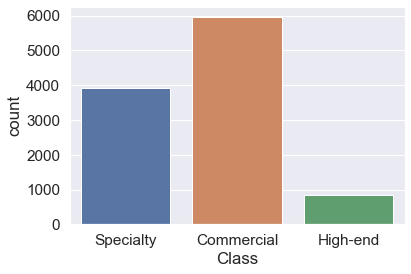

In [28]:
#check the distribution
print(train['Class'].value_counts())
print(test['Class'].value_counts())

ax = sns.countplot(x="Class", data=train)


[0.00323295 0.05558448 0.05873441 0.03368101 0.33011855 0.1126525
 0.0474096  0.06164506 0.01545284 0.09829986 0.06052127 0.02735755
 0.00540302 0.02022054 0.00820983 0.         0.01745853 0.01184409
 0.00651491 0.00181959 0.01822189 0.00561753]


<BarContainer object of 22 artists>

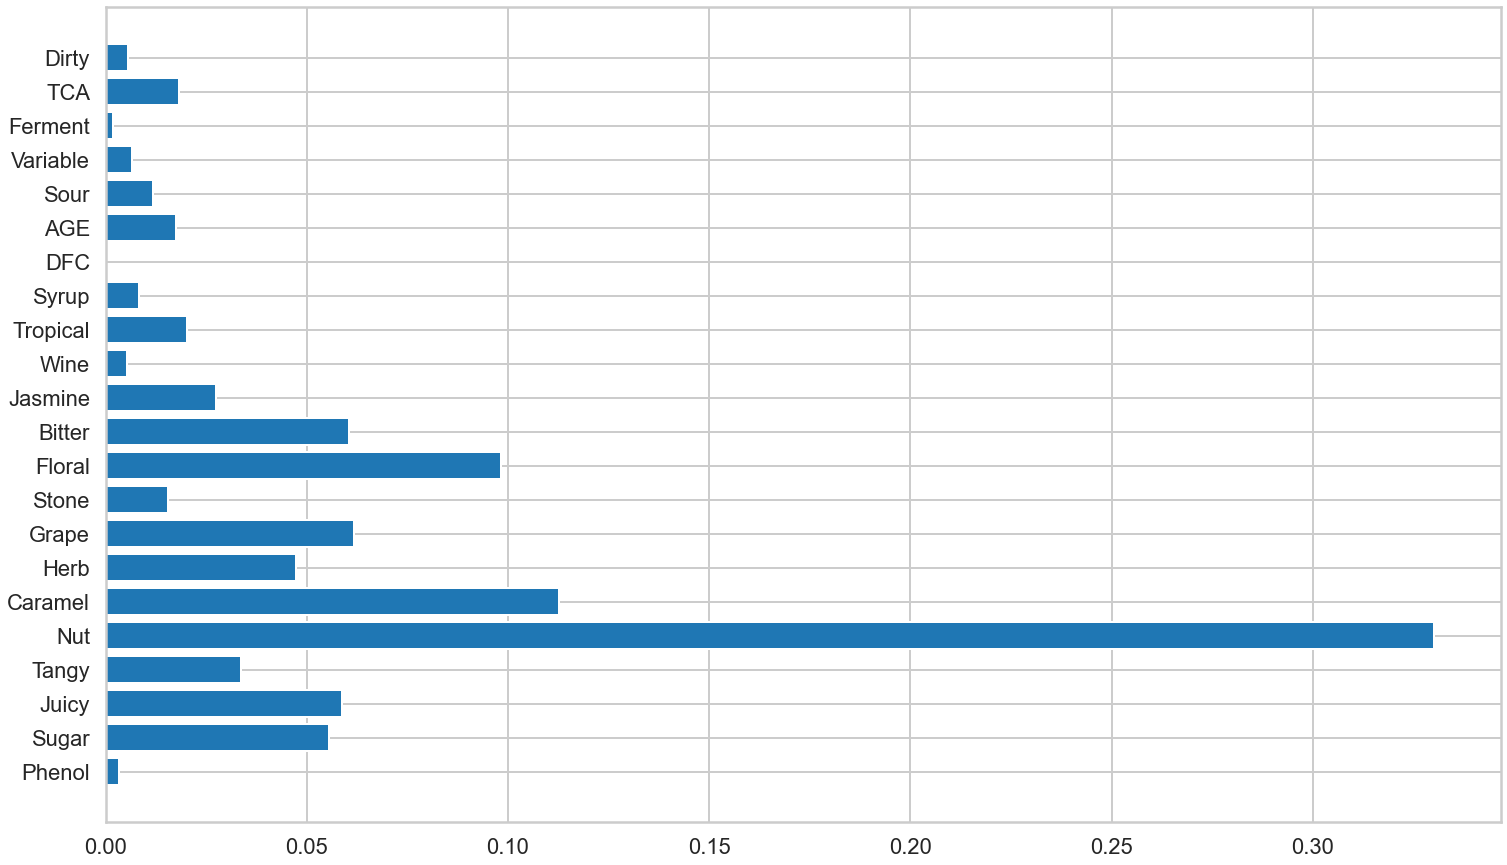

In [6]:
#plot feature importance
feature = train[['Phenol','Sugar','Juicy','Tangy','Nut','Caramel','Herb','Grape','Stone','Floral','Bitter','Jasmine','Wine','Tropical','Syrup','DFC','AGE','Sour','Variable','Ferment','TCA','Dirty']]
target = train['Class']
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
from sklearn.inspection import permutation_importance
clf.fit(feature,target)
print(clf.feature_importances_)
 
col_names=['Phenol','Sugar','Juicy','Tangy','Nut','Caramel','Herb','Grape','Stone','Floral','Bitter','Jasmine','Wine','Tropical','Syrup','DFC','AGE','Sour','Variable','Ferment','TCA','Dirty']
plt.figure(figsize=(25,15))
plt.barh(col_names, clf.feature_importances_)


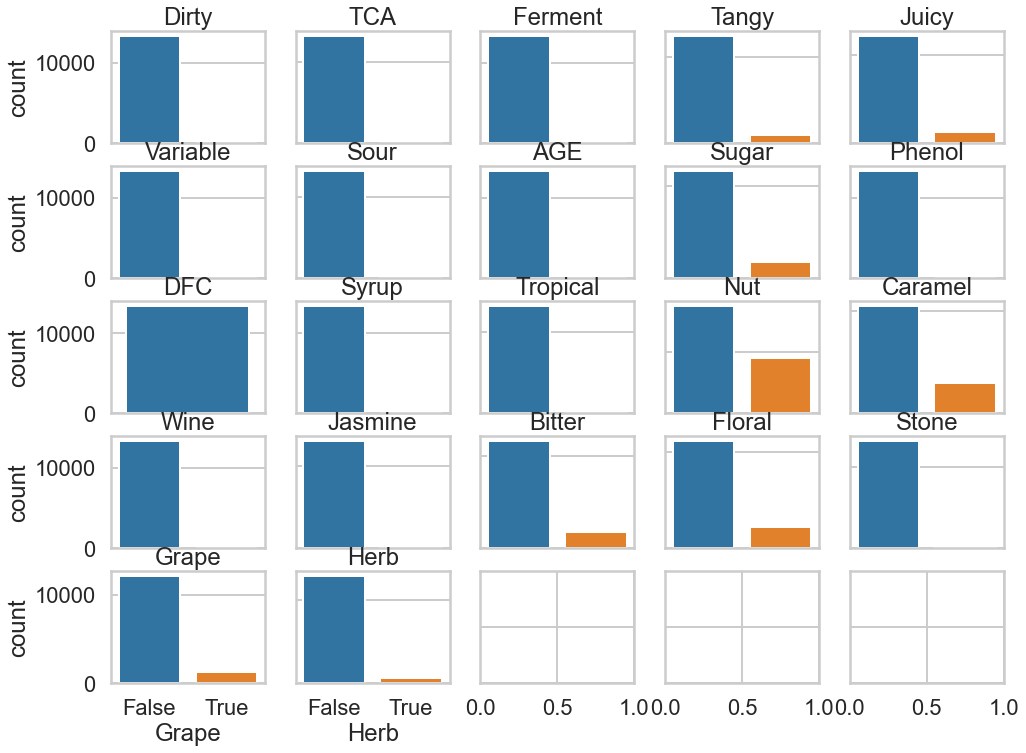

In [7]:
#EDA plot the distribution of every feature
fig, axs = plt.subplots(5, 5,figsize=(16,12))
sns.countplot(ax=axs[0,0], x='Dirty',data = sensory)
axs[0,0].set_title('Dirty')
sns.countplot(ax=axs[0,1], x='TCA',data = sensory)
axs[0,1].set_title('TCA')
sns.countplot(ax=axs[0,2], x='Ferment',data = sensory)
axs[0,2].set_title('Ferment')
sns.countplot(ax=axs[0,3], x='Tangy',data = sensory)
axs[0,3].set_title('Tangy')
sns.countplot(ax=axs[0,4], x='Juicy',data = sensory)
axs[0,4].set_title('Juicy')
sns.countplot(ax=axs[1,0], x='Variable',data = sensory)
axs[1,0].set_title('Variable')
sns.countplot(ax=axs[1,1], x='Sour',data = sensory)
axs[1,1].set_title('Sour')
sns.countplot(ax=axs[1,2], x='AGE',data = sensory)
axs[1,2].set_title('AGE')
sns.countplot(ax=axs[1,3], x='Sugar',data = sensory)
axs[1,3].set_title('Sugar')
sns.countplot(ax=axs[1,4], x='Phenol',data = sensory)
axs[1,4].set_title('Phenol')
sns.countplot(ax=axs[2,0], x='DFC',data = sensory)
axs[2,0].set_title('DFC')
sns.countplot(ax=axs[2,1], x='Syrup',data = sensory)
axs[2,1].set_title('Syrup')
sns.countplot(ax=axs[2,2], x='Tropical',data = sensory)
axs[2,2].set_title('Tropical')
sns.countplot(ax=axs[3,0], x='Wine',data = sensory)
axs[3,0].set_title('Wine')
sns.countplot(ax=axs[3,1], x='Jasmine',data = sensory)
axs[3,1].set_title('Jasmine')
sns.countplot(ax=axs[3,2], x='Bitter',data = sensory)
axs[3,2].set_title('Bitter')
sns.countplot(ax=axs[3,3], x='Floral',data = sensory)
axs[3,3].set_title('Floral')
sns.countplot(ax=axs[3,4], x='Stone',data = sensory)
axs[3,4].set_title('Stone')
sns.countplot(ax=axs[4,0], x='Grape',data = sensory)
axs[4,0].set_title('Grape')
sns.countplot(ax=axs[4,1], x='Herb',data = sensory)
axs[4,1].set_title('Herb')
sns.countplot(ax=axs[2,4], x='Caramel',data = sensory)
axs[2,4].set_title('Caramel')
sns.countplot(ax=axs[2,3], x='Nut',data = sensory)
axs[2,3].set_title('Nut')



for ax in axs.flat:
    ax.set(ylabel='count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

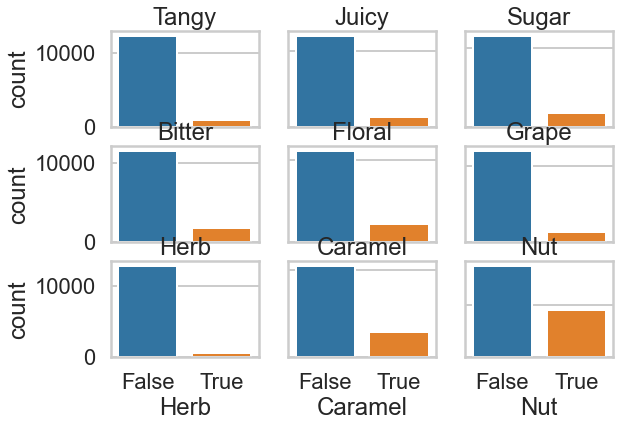

In [8]:
#EDA plot the distribution of every feature
fig, axs = plt.subplots(3, 3,figsize=(9,6))

sns.countplot(ax=axs[0,0], x='Tangy',data = sensory)
axs[0,0].set_title('Tangy')
sns.countplot(ax=axs[0,1], x='Juicy',data = sensory)
axs[0,1].set_title('Juicy')
sns.countplot(ax=axs[0,2], x='Sugar',data = sensory)
axs[0,2].set_title('Sugar')
sns.countplot(ax=axs[1,0], x='Bitter',data = sensory)
axs[1,0].set_title('Bitter')
sns.countplot(ax=axs[1,1], x='Floral',data = sensory)
axs[1,1].set_title('Floral')
sns.countplot(ax=axs[1,2], x='Grape',data = sensory)
axs[1,2].set_title('Grape')
sns.countplot(ax=axs[2,0], x='Herb',data = sensory)
axs[2,0].set_title('Herb')
sns.countplot(ax=axs[2,1], x='Caramel',data = sensory)
axs[2,1].set_title('Caramel')
sns.countplot(ax=axs[2,2], x='Nut',data = sensory)
axs[2,2].set_title('Nut')



for ax in axs.flat:
    ax.set(ylabel='count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [9]:
#Based on feature importance and distribution plot, delete insignificant feature
training_feature = train[['Sugar','Juicy','Tangy','Nut','Caramel','Herb','Grape','Floral','Bitter']]
training_target =train['Class']
testing_feature = test[['Sugar','Juicy','Tangy','Nut','Caramel','Herb','Grape','Floral','Bitter']]
testing_target = test['Class']

In [10]:
#Using SMOTE to oversample data, data after oversampling are Xover and yover.
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


over = SMOTE()
# fit and apply the transform
over_feature, over_target = over.fit_resample(training_feature, training_target)
# summarize class distribution
print(Counter(over_target))



Counter({'Specialty': 5954, 'Commercial': 5954, 'High-end': 5954})


## Decision Tree

In [11]:
from sklearn import tree
from sklearn import metrics
DecisionTree = tree.DecisionTreeClassifier()
dt = DecisionTree.fit(training_feature,training_target)

dt_pred = dt.predict(testing_feature)
print("Accuracy for non oversampled:",metrics.accuracy_score(testing_target, dt_pred))
dtover = DecisionTree.fit(over_feature,over_target)
dtover_pred = dtover.predict(testing_feature)

print("Accuracy for oversampled:",metrics.accuracy_score(testing_target, dtover_pred))


Accuracy for non oversampled: 0.7215994020926756
Accuracy for oversampled: 0.6423766816143498


[[1241  201   24]
 [ 338  657    1]
 [ 178    3   33]]


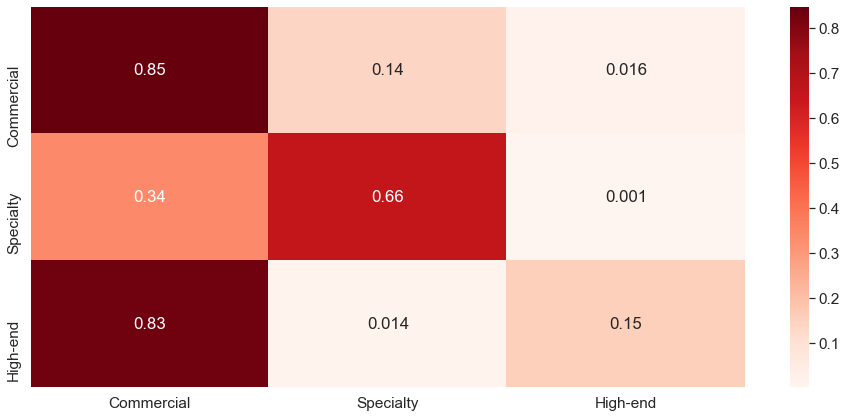

In [12]:
#without oversampled data

from sklearn.metrics import confusion_matrix
import numpy as np
dtconf_mat = confusion_matrix(testing_target, dt_pred,labels = ['Commercial','Specialty','High-end'])
print(dtconf_mat)

matrix = dtconf_mat.astype('float') /dtconf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);


[[908 221 337]
 [286 687  23]
 [ 86   4 124]]


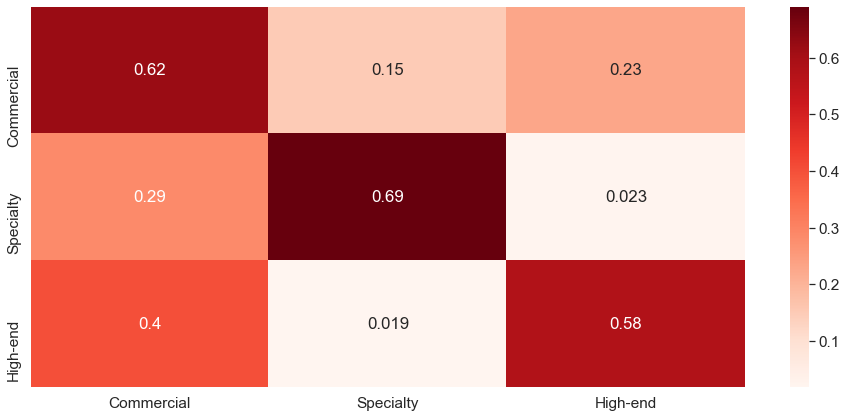

In [13]:
#with oversampled data

dtoverconf_mat = confusion_matrix(testing_target, dtover_pred,labels = ['Commercial','Specialty','High-end'])
print(dtoverconf_mat)

matrix = dtoverconf_mat.astype('float') / dtoverconf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(training_feature,training_target)
clf_pred_y = clf.predict(testing_feature)
print("Accuracy for not oversampled: ",metrics.accuracy_score(testing_target, clf_pred_y))
#oversampled
clf.fit(over_feature,over_target)
clf_pred_y_os = clf.predict(testing_feature)
print("Accuracy for oversampled:",metrics.accuracy_score(testing_target, clf_pred_y_os))


Accuracy for not oversampled:  0.7234678624813154
Accuracy for oversampled: 0.6363976083707026


[[1242  200   24]
 [ 334  661    1]
 [ 178    3   33]]


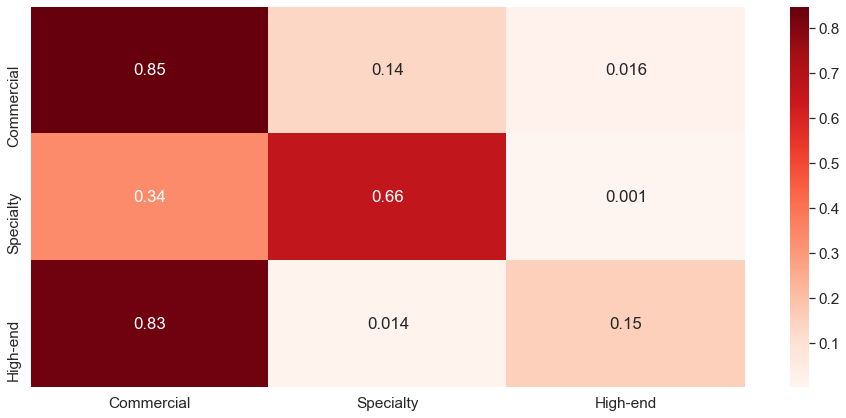

In [15]:
#with oversampled data

from sklearn.metrics import confusion_matrix
import numpy as np
conf_mat = confusion_matrix(testing_target, clf_pred_y,labels = ['Commercial','Specialty','High-end'])
print(conf_mat)

matrix = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);


[[891 224 351]
 [285 687  24]
 [ 85   4 125]]


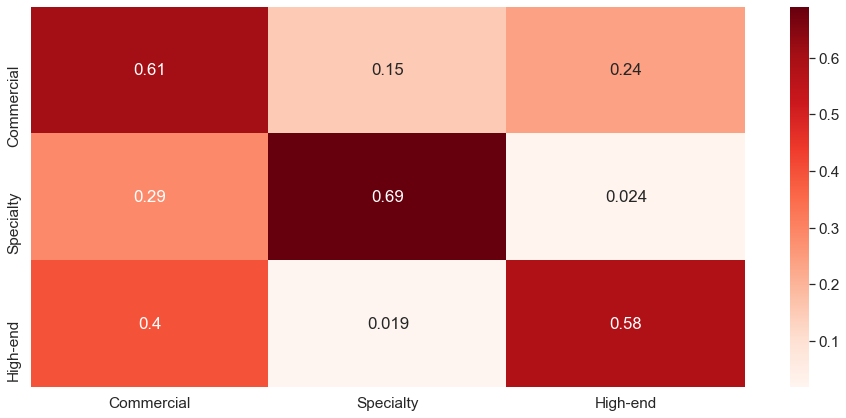

In [16]:
#with oversampled data

from sklearn.metrics import confusion_matrix
import numpy as np
conf_mat = confusion_matrix(testing_target, clf_pred_y_os,labels = ['Commercial','Specialty','High-end'])
print(conf_mat)

matrix = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);


## KNN

Text(0, 0.5, 'Error Rate')

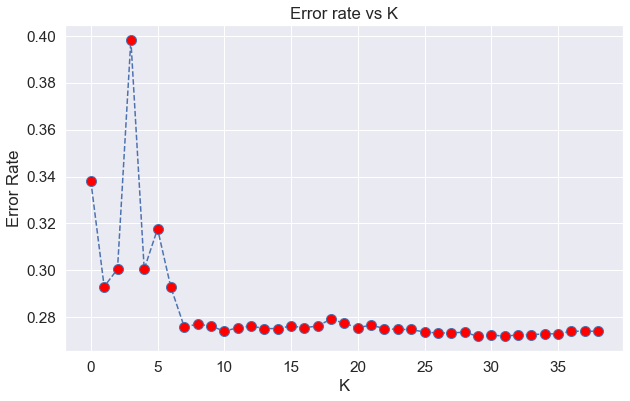

In [17]:
#elbow graph
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(training_feature,training_target)
 pred_i = knn.predict(testing_feature)
 error_rate.append(np.mean(pred_i != testing_target))
plt.figure(figsize=(10,6))
plt.plot(error_rate, linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(training_feature,training_target)
neigh_pred = neigh.predict(testing_feature)
print("Accuracy for not oversampled: ",metrics.accuracy_score(testing_target, neigh_pred))
#oversampled data
neigh.fit(over_feature,over_target)
neigh_pred_os = neigh.predict(testing_feature)
print("Accuracy for oversampled:",metrics.accuracy_score(testing_target, neigh_pred_os))

Accuracy for not oversampled:  0.7073991031390134
Accuracy for oversampled: 0.6767563527653214


[[1159  242   65]
 [ 310  683    3]
 [ 159    4   51]]


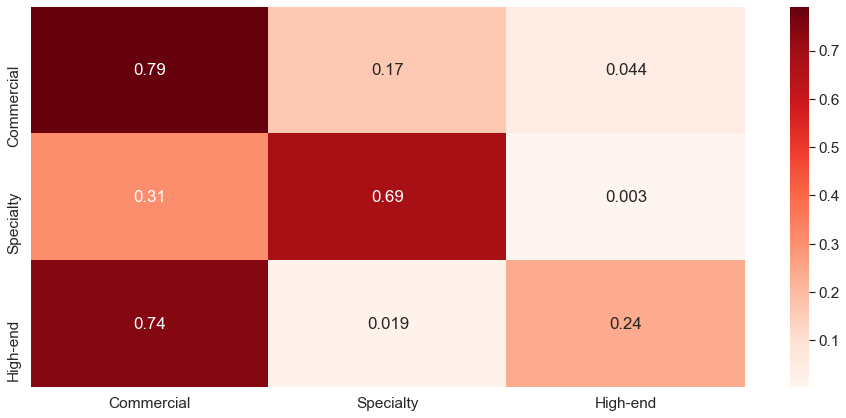

In [26]:
#without oversampled data

conf_mat = confusion_matrix(testing_target,neigh_pred,labels = ['Commercial','Specialty','High-end'] )
print(conf_mat)

matrix = conf_mat.astype('float') /conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);


[[1095  199  172]
 [ 321  651   24]
 [ 146    3   65]]


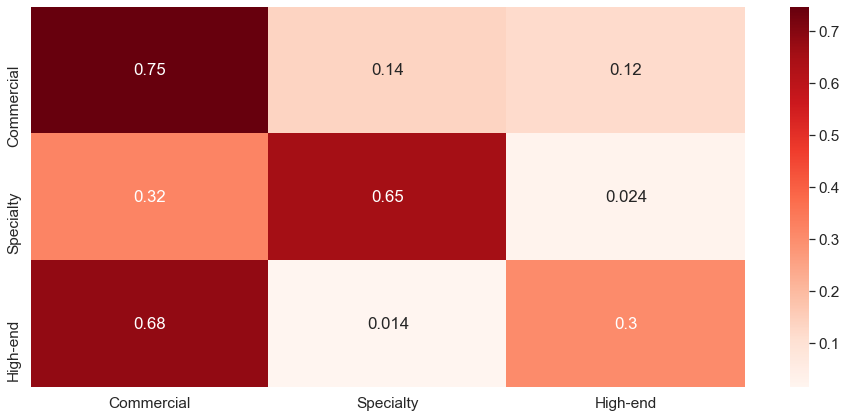

In [27]:
#with oversampled data

conf_mat = confusion_matrix(testing_target,neigh_pred_os,labels = ['Commercial','Specialty','High-end'] )
print(conf_mat)

matrix = conf_mat.astype('float') /conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);


## XGboost

In [21]:
!pip3 install xgboost
!pip install --upgrade xgboost

In [22]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(training_feature, training_target)
y_pred2 = xgboost.predict(testing_feature)
xgboost.fit(over_feature, over_target)
y_pred3 = xgboost.predict(testing_feature)
# evaluate predictions
accuracy = accuracy_score(testing_target, y_pred2)
print("Accuracy for not oversampled: ",metrics.accuracy_score(testing_target, y_pred2))
accuracy = accuracy_score(testing_target, y_pred3)
print("Accuracy for oversampled:",metrics.accuracy_score(testing_target, y_pred3))

/Users/kopeihsuan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for not oversampled:  0.7242152466367713
Accuracy for oversampled: 0.64050822122571


[[1247  198   21]
 [ 336  659    1]
 [ 179    3   32]]


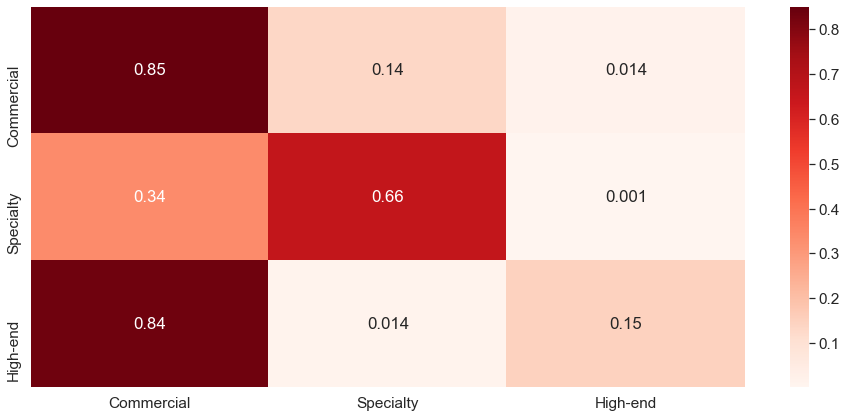

In [23]:
#without oversampled data

conf_mat = confusion_matrix(testing_target, y_pred2,labels = ['Commercial','Specialty','High-end'])
print(conf_mat)

matrix = conf_mat.astype('float') /conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);


[[903 224 339]
 [287 687  22]
 [ 86   4 124]]


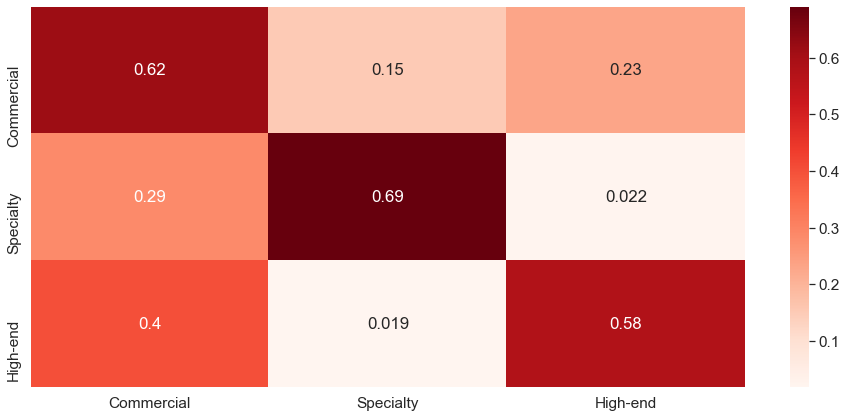

In [24]:
#with oversampled data
from sklearn.metrics import confusion_matrix
import numpy as np
conf_mat = confusion_matrix(testing_target, y_pred3,labels = ['Commercial','Specialty','High-end'])
print(conf_mat)

matrix = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax,cmap=plt.cm.Reds); 
ax.xaxis.set_ticklabels(['Commercial','Specialty','High-end']); ax.yaxis.set_ticklabels(['Commercial','Specialty','High-end']);

